In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [ ]:
!python -m spacy download en_core_web_sm

2023-12-20 07:22:22.820824: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 07:22:22.820901: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 07:22:22.822426: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 07:22:24.269523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import pandas
pw=pd.read_csv("positive-words.txt",error_bad_lines=False)
pw

<ipython-input-3-ce47f5b46845>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pw=pd.read_csv("positive-words.txt",error_bad_lines=False)
Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [ ]:
pw.columns

Index([';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;'], dtype='object')

In [ ]:
pw.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'w'},inplace=True)

In [ ]:
pw.columns

Index(['w'], dtype='object')

In [ ]:
pw=[w.strip() for w in pw.w] # remove both the leading and the trailing characters
pw=[w for w in pw if w] # removes empty strings, because they are considered in Python as False
pw[0:10]

[';',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."']

In [ ]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')
one_block = pw[10]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
# Joining the list into one string/text
pw_text = ' '.join(pw)
pw_text

'; ; Opinion Lexicon: Positive ; ; This file contains a list of POSITIVE opinion words (or sentiment words). ; ; This file and the papers can all be downloaded from ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html ; ; ;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ;       Proceedings of the ACM SIGKDD International Conference on Knowledge ;       and Comparing Opinions on the Web." Proceedings of the 14th ; ; Notes: ;    1. The appearance of an opinion word in a sentence does not necessarily ;       mean that the sentence expresses a positive or negative opinion. ;       See the paper below: ; ;       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in ; ;    2. You will notice many misspelled words in the list. They are not ;       mistakes. They are included as these misspelled words appear ;       frequently in social media content. ; ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;; a+ abound abounds abundan

In [ ]:
#Punctuation
no_punc_text = pw_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'  Opinion Lexicon Positive   This file contains a list of POSITIVE opinion words or sentiment words   This file and the papers can all be downloaded from     httpwwwcsuiceduliubFBSsentimentanalysishtml      Minqing Hu and Bing Liu Mining and Summarizing Customer Reviews        Proceedings of the ACM SIGKDD International Conference on Knowledge        and Comparing Opinions on the Web Proceedings of the 14th   Notes     1 The appearance of an opinion word in a sentence does not necessarily        mean that the sentence expresses a positive or negative opinion        See the paper below         Bing Liu Sentiment Analysis and Subjectivity An chapter in      2 You will notice many misspelled words in the list They are not        mistakes They are included as these misspelled words appear        frequently in social media content   a abound abounds abundance abundant accessable accessible acclaim acclaimed acclamation accolade accolades accommodative accomodative accomplish accomplished a

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Opinion', 'Lexicon', 'Positive', 'This', 'file', 'contains', 'a', 'list', 'of', 'POSITIVE', 'opinion', 'words', 'or', 'sentiment', 'words', 'This', 'file', 'and', 'the', 'papers', 'can', 'all', 'be', 'downloaded', 'from', 'httpwwwcsuiceduliubFBSsentimentanalysishtml', 'Minqing', 'Hu', 'and', 'Bing', 'Liu', 'Mining', 'and', 'Summarizing', 'Customer', 'Reviews', 'Proceedings', 'of', 'the', 'ACM', 'SIGKDD', 'International', 'Conference', 'on', 'Knowledge', 'and', 'Comparing', 'Opinions', 'on', 'the']


In [ ]:
len(text_tokens)

2125

In [ ]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['Opinion', 'Lexicon', 'Positive', 'This', 'file', 'contains', 'list', 'POSITIVE', 'opinion', 'words', 'sentiment', 'words', 'This', 'file', 'papers', 'downloaded', 'httpwwwcsuiceduliubFBSsentimentanalysishtml', 'Minqing', 'Hu', 'Bing', 'Liu', 'Mining', 'Summarizing', 'Customer', 'Reviews', 'Proceedings', 'ACM', 'SIGKDD', 'International', 'Conference', 'Knowledge', 'Comparing', 'Opinions', 'Web', 'Proceedings', '14th', 'Notes', '1', 'The', 'appearance']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['opinion', 'lexicon', 'positive', 'this', 'file', 'contains', 'list', 'positive', 'opinion', 'words', 'sentiment', 'words', 'this', 'file', 'papers', 'downloaded', 'httpwwwcsuiceduliubfbssentimentanalysishtml', 'minqing', 'hu', 'bing', 'liu', 'mining', 'summarizing', 'customer', 'reviews']


In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['opinion', 'lexicon', 'posit', 'thi', 'file', 'contain', 'list', 'posit', 'opinion', 'word', 'sentiment', 'word', 'thi', 'file', 'paper', 'download', 'httpwwwcsuiceduliubfbssentimentanalysishtml', 'minq', 'hu', 'bing', 'liu', 'mine', 'summar', 'custom', 'review', 'proceed', 'acm', 'sigkdd', 'intern', 'confer', 'knowledg', 'compar', 'opinion', 'web', 'proceed', '14th', 'note', '1', 'the', 'appear']


In [ ]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Opinion Lexicon Positive This file contains list POSITIVE opinion words sentiment words This file papers downloaded httpwwwcsuiceduliubFBSsentimentanalysishtml Minqing Hu Bing Liu Mining Summarizing Customer Reviews Proceedings ACM SIGKDD International Conference Knowledge Comparing Opinions Web Proceedings 14th Notes 1 The appearance


In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['opinion', 'Lexicon', 'Positive', 'this', 'file', 'contain', 'list', 'POSITIVE', 'opinion', 'word', 'sentiment', 'word', 'this', 'file', 'paper', 'download', 'httpwwwcsuiceduliubFBSsentimentanalysishtml', 'Minqing', 'Hu', 'Bing', 'Liu', 'Mining', 'Summarizing', 'Customer', 'Reviews']


#### Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [ ]:
print(vectorizer.vocabulary_)

{'opinion': 1098, 'lexicon': 963, 'positive': 1189, 'this': 1605, 'file': 642, 'contain': 306, 'list': 973, 'word': 1784, 'sentiment': 1428, 'paper': 1130, 'download': 409, 'httpwwwcsuiceduliubfbssentimentanalysishtml': 821, 'minqing': 1054, 'hu': 822, 'bing': 178, 'liu': 974, 'mining': 1053, 'summarizing': 1550, 'customer': 345, 'reviews': 1360, 'proceedings': 1217, 'acm': 18, 'sigkdd': 1437, 'international': 901, 'conference': 293, 'knowledge': 946, 'comparing': 279, 'opinions': 1099, 'web': 1736, '14th': 0, 'note': 1086, 'the': 1602, 'appearance': 101, 'sentence': 1427, 'necessarily': 1073, 'mean': 1033, 'express': 569, 'negative': 1074, 'see': 1414, 'analysis': 95, 'subjectivity': 1537, 'an': 94, 'chapter': 232, 'you': 1794, 'notice': 1088, 'many': 1018, 'misspelled': 1059, 'they': 1603, 'mistake': 1060, 'include': 862, 'appear': 100, 'frequently': 677, 'social': 1467, 'medium': 1035, 'content': 307, 'abound': 1, 'abundance': 2, 'abundant': 3, 'accessable': 4, 'accessible': 5, 'acc

In [ ]:
print(vectorizer.vocabulary_)

{'opinion': 1098, 'lexicon': 963, 'positive': 1189, 'this': 1605, 'file': 642, 'contain': 306, 'list': 973, 'word': 1784, 'sentiment': 1428, 'paper': 1130, 'download': 409, 'httpwwwcsuiceduliubfbssentimentanalysishtml': 821, 'minqing': 1054, 'hu': 822, 'bing': 178, 'liu': 974, 'mining': 1053, 'summarizing': 1550, 'customer': 345, 'reviews': 1360, 'proceedings': 1217, 'acm': 18, 'sigkdd': 1437, 'international': 901, 'conference': 293, 'knowledge': 946, 'comparing': 279, 'opinions': 1099, 'web': 1736, '14th': 0, 'note': 1086, 'the': 1602, 'appearance': 101, 'sentence': 1427, 'necessarily': 1073, 'mean': 1033, 'express': 569, 'negative': 1074, 'see': 1414, 'analysis': 95, 'subjectivity': 1537, 'an': 94, 'chapter': 232, 'you': 1794, 'notice': 1088, 'many': 1018, 'misspelled': 1059, 'they': 1603, 'mistake': 1060, 'include': 862, 'appear': 100, 'frequently': 677, 'social': 1467, 'medium': 1035, 'content': 307, 'abound': 1, 'abundance': 2, 'abundant': 3, 'accessable': 4, 'accessible': 5, 'acc

In [ ]:
print(X.toarray().shape)

(2081, 1800)



Let's see how can bigrams and trigrams can be included here

In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(pw)

####  Generate wordcloud


In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")

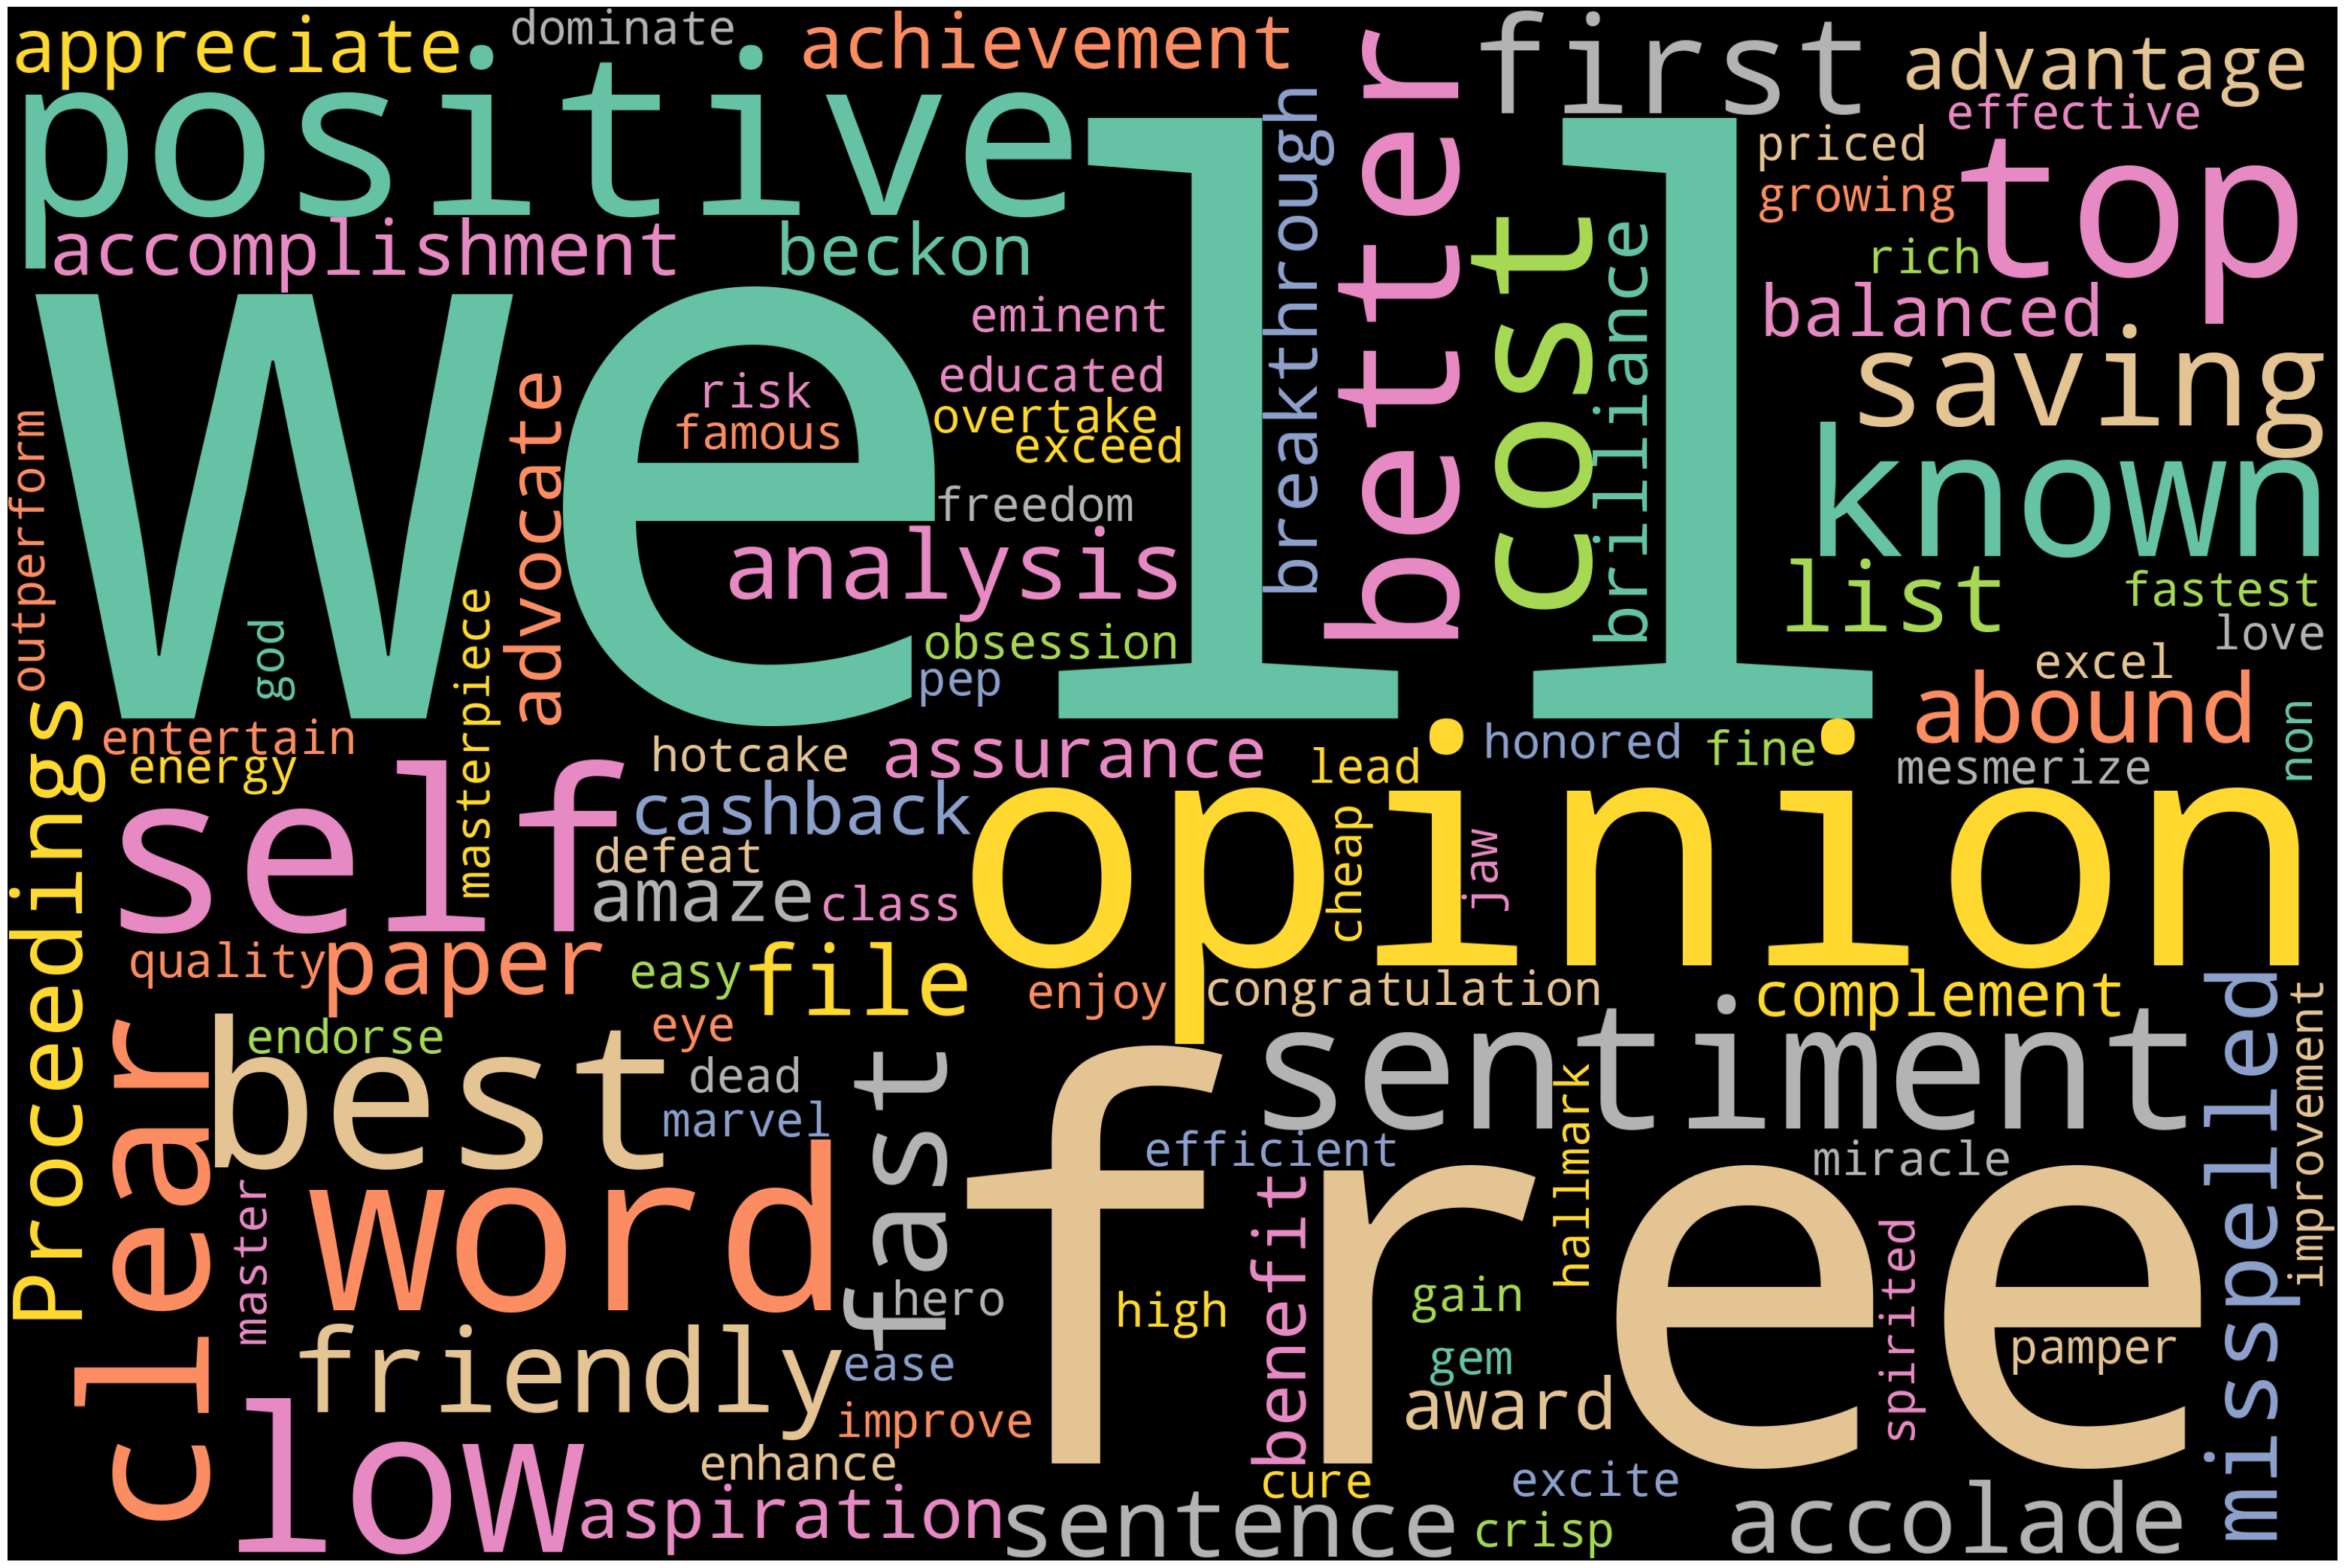

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(pw_text)
# Plot
plot_cloud(wordcloud)

Named Entity Recognition

In [ ]:
clean_pw=' '.join(lemmas)
clean_pw

'opinion Lexicon Positive this file contain list POSITIVE opinion word sentiment word this file paper download httpwwwcsuiceduliubFBSsentimentanalysishtml Minqing Hu Bing Liu Mining Summarizing Customer Reviews Proceedings ACM SIGKDD International Conference Knowledge Comparing Opinions Web Proceedings 14th note 1 the appearance opinion word sentence necessarily mean sentence express positive negative opinion see paper Bing Liu Sentiment Analysis Subjectivity an chapter 2 you notice many misspelled word list they mistake they include misspelled word appear frequently social medium content abound abound abundance abundant accessable accessible acclaim acclaim acclamation accolade accolade accommodative accomodative accomplish accomplish accomplishment accomplishment accurate accurately achievable achievement achievement achievible acuman adaptable adaptive adequate adjustable admirable admirably admiration admire admirer admire admiringly adorable adore adore adorer adore adoringly adro

In [ ]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')
one_block = clean_pw
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)